In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler

from training_utils import prepare_dataset, print_metrics

random_seed = 42

In [2]:
Xtrain, ytrain, Xval, yval, sample_weight = prepare_dataset()
print(f"Training samples: {Xtrain.shape[0]}, Validation samples: {Xval.shape[0]}")

Training samples: 4976, Validation samples: 247


In [4]:
scaler = StandardScaler()
Xtrain_S = scaler.fit_transform(Xtrain)
Xval_S = scaler.transform(Xval)

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear','newton-cg'],
}

best_accuracy = 0
best_params = None

for params in ParameterGrid(param_grid):
    clf = LogisticRegression(random_state=random_seed, **params)
    clf.fit(Xtrain_S, ytrain, sample_weight=sample_weight)
    
    yval_pred = clf.predict(Xval_S)
    accuracy = accuracy_score(yval, yval_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Parameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)

Best Parameters: {'C': 10, 'solver': 'lbfgs'}
Best Validation Accuracy: 0.7125506072874493


Accuracy: 0.7125506072874493
Confusion Matrix:
[[91 30]
 [41 85]]
F1 Score: 0.7053941908713693
Best Threshold (Youden's J statistic): 0.5433436692828061


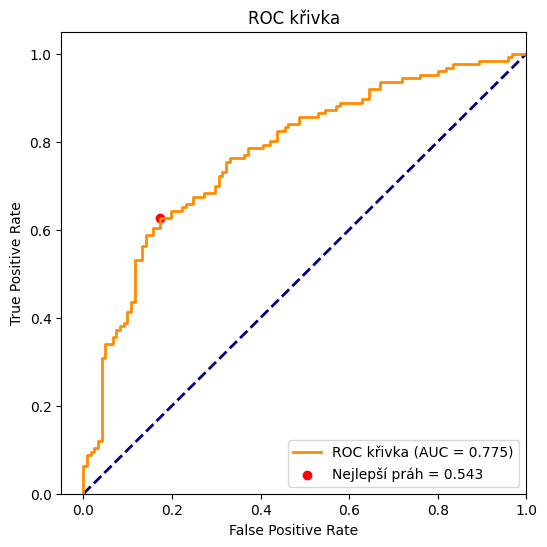

In [5]:
model = LogisticRegression(random_state=random_seed, **best_params)
model.fit(Xtrain_S, ytrain, sample_weight=sample_weight)

yval_pred = model.predict(Xval_S)
yval_proba = model.predict_proba(Xval_S)[:, 1]

print_metrics(yval, yval_pred, yval_proba)